##Flowchart
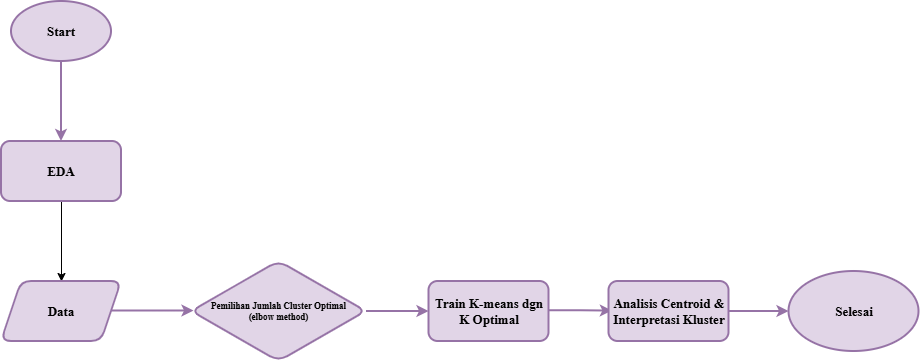

# Clustering

## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Datasets

In [17]:
import os

from google.colab import drive
drive.mount('/content/drive')
bank = pd.read_csv("/content/drive/My Drive/Analisis Multivariat/bank_data.csv")
bank.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   account_id      1000 non-null   int64
 1   balance         1000 non-null   int64
 2   loan_amount     1000 non-null   int64
 3   credit_score    1000 non-null   int64
 4   monthly_income  1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [18]:
bank.head()

,account_id,balance,loan_amount,credit_score,monthly_income
0,100,141,171,783,144
1,101,134,150,936,133
2,102,142,136,942,153
3,103,152,146,807,148
4,104,133,160,878,156


## K-Means Clustering

In [19]:
bank.head()

,account_id,balance,loan_amount,credit_score,monthly_income
0,100,141,171,783,144
1,101,134,150,936,133
2,102,142,136,942,153
3,103,152,146,807,148
4,104,133,160,878,156


In [20]:
# check missing values
bank.isna().sum()

,0
account_id,0
balance,0
loan_amount,0
credit_score,0
monthly_income,0


In [21]:
# check duplicates
bank.duplicated().sum()

np.int64(0)

In [22]:
# minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bank_scaled = scaler.fit_transform(bank)

pd.DataFrame(bank_scaled).describe()

,0,1,2,3,4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.500000,0.442673,0.453640,0.541921,0.422657
std,0.289139,0.347773,0.313128,0.284983,0.338259
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.046719,0.071190,0.245829,0.058954
50%,0.500000,0.402670,0.490545,0.540044,0.355395
75%,0.750000,0.868743,0.764461,0.854561,0.836485
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# elbow method from k=1 to k=10
from sklearn.cluster import KMeans

# track sum of squared error
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(bank_scaled)
    sse.append(kmeans.inertia_)

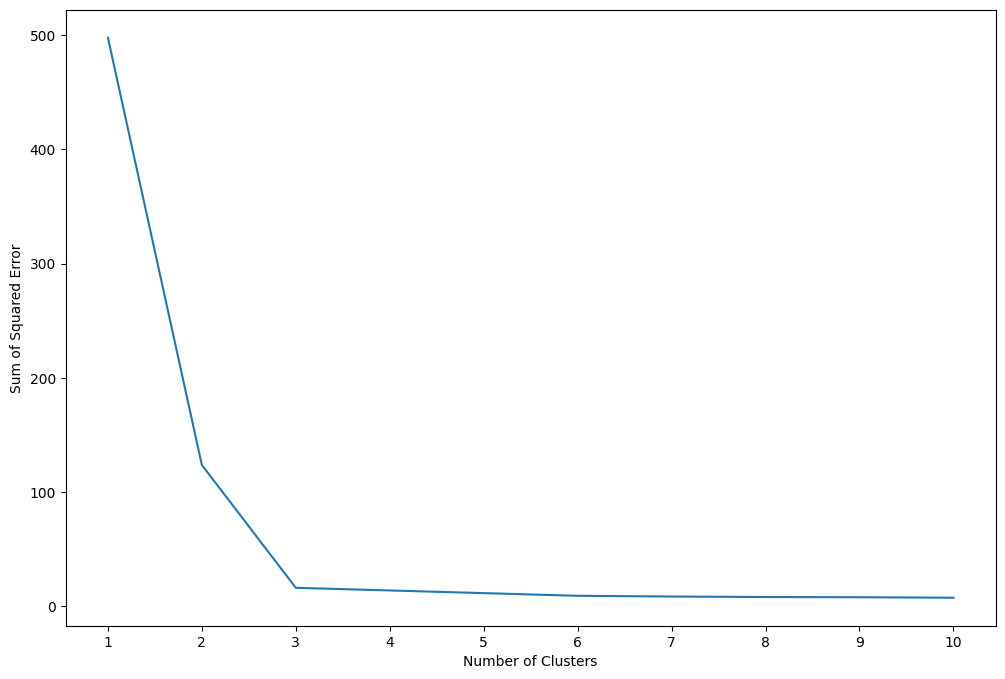

In [24]:
# draw the SSE decline progression
import matplotlib.pyplot as plt
plt.figure(figsize = (12,8))
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Error")
plt.show()

k=3 yang paling optimal karena berdasarkan plot nilai SSE menggunakan elbow method  

In [25]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(bank_scaled)

# assign class label to bank df
bank["label"] = kmeans.labels_
bank.head()

,account_id,balance,loan_amount,credit_score,monthly_income,label
0,100,141,171,783,144,0
1,101,134,150,936,133,0
2,102,142,136,942,153,0
3,103,152,146,807,148,0
4,104,133,160,878,156,0


In [26]:
# compute mean of each feature column by group by label
bank.groupby("label").mean()

,account_id,balance,loan_amount,credit_score,monthly_income
label,,,,,
0,399.650675,298.854573,346.716642,740.2009,281.389805
1,849.648649,896.777778,830.516517,280.6997,877.723724


Cluster 0: Nasabah dengan saldo, pinjaman, dan pendapatan pada tingkat sedang, tetapi skor kredit cukup baik sehingga risikonya sedang.

Cluster 1: Nasabah berpendapatan dan bersaldo tinggi namun memiliki pinjaman besar serta skor kredit rendah sehingga risikonya tinggi.

In [27]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(bank_scaled)

# assign class label to bank df
bank["label"] = kmeans.labels_
bank.head()

,account_id,balance,loan_amount,credit_score,monthly_income,label
0,100,141,171,783,144,2
1,101,134,150,936,133,2
2,102,142,136,942,153,2
3,103,152,146,807,148,2
4,104,133,160,878,156,2


In [28]:
# compute mean of each feature column by group by label
bank.groupby("label").mean()

,account_id,balance,loan_amount,credit_score,monthly_income
label,,,,,
0,549.948949,462.792793,542.168168,585.303303,419.180180
1,849.648649,896.777778,830.516517,280.699700,877.723724
2,249.802395,135.407186,151.850299,894.634731,144.011976


Cluster 0: Nasabah dengan pendapatan, saldo, dan pinjaman tingkat sedang serta skor kredit cukup baik, sehingga risikonya sedang.

Cluster 1: Nasabah berpendapatan dan bersaldo tinggi tetapi memiliki pinjaman besar dan skor kredit rendah, sehingga risikonya tinggi.

Cluster 2: Nasabah berpendapatan rendah dengan pinjaman kecil namun skor kredit sangat tinggi, sehingga risikonya rendah.

In [29]:
# retrain k-means with optimal k
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(bank_scaled)

# assign class label to bank df
bank["label"] = kmeans.labels_
bank.head()

,account_id,balance,loan_amount,credit_score,monthly_income,label
0,100,141,171,783,144,2
1,101,134,150,936,133,2
2,102,142,136,942,153,2
3,103,152,146,807,148,2
4,104,133,160,878,156,2


In [30]:
# compute mean of each feature column by group by label
bank.groupby("label").mean()

,account_id,balance,loan_amount,credit_score,monthly_income
label,,,,,
0,477.093567,463.631579,541.081871,580.830409,418.403509
1,849.648649,896.777778,830.516517,280.699700,877.723724
2,249.802395,135.407186,151.850299,894.634731,144.011976
3,626.851852,461.907407,543.314815,590.024691,420.000000


Cluster 0: Nasabah dengan pendapatan, saldo, dan pinjaman tingkat sedang serta skor kredit cukup baik, sehingga risikonya sedang.

Cluster 1: Nasabah berpendapatan dan bersaldo tinggi tetapi memiliki pinjaman terbesar dan skor kredit sangat rendah, sehingga risikonya tinggi.

Cluster 2: Nasabah berpendapatan rendah dengan pinjaman kecil namun skor kredit sangat tinggi, sehingga risikonya rendah.

Cluster 3: Nasabah dengan pendapatan, saldo, dan pinjaman tingkat sedang serta skor kredit cukup tinggi, sehingga risikonya rendah

In [31]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score

def cluster_validation_all_metrics(data_scaled, k_values):
    results = []

    for k in k_values:

        # ------------------------------
        # 1. EUCLIDEAN
        # ------------------------------
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        labels_euclid = kmeans.fit_predict(data_scaled)
        sil_euclid = silhouette_score(data_scaled, labels_euclid, metric="euclidean")

        # ------------------------------
        # 2. MANHATTAN
        # ------------------------------
        agg_man = AgglomerativeClustering(
            n_clusters=k,
            metric="manhattan",
            linkage="average"
        )
        labels_man = agg_man.fit_predict(data_scaled)
        sil_man = silhouette_score(data_scaled, labels_man, metric="manhattan")

        # ------------------------------
        # 3. CANBERRA
        # ------------------------------
        agg_can = AgglomerativeClustering(
            n_clusters=k,
            metric="canberra",
            linkage="average"
        )
        labels_can = agg_can.fit_predict(data_scaled)
        sil_can = silhouette_score(data_scaled, labels_can, metric="canberra")

        # ------------------------------
        # Simpan hasil
        # ------------------------------
        results.append({
            "k": k,
            "Silhouette_Euclidean": sil_euclid,
            "Silhouette_Manhattan": sil_man,
            "Silhouette_Canberra": sil_can
        })

    return pd.DataFrame(results)
validation_results = cluster_validation_all_metrics(bank_scaled, [2, 3, 4])
validation_results

,k,Silhouette_Euclidean,Silhouette_Manhattan,Silhouette_Canberra
0,2,0.678816,0.696782,0.706835
1,3,0.805269,0.847586,0.612611
2,4,0.658594,0.654309,0.683934


##kesimpulan
Kesimpulannya, k = 3 dipilih sebagai yang paling optimal karena memberikan nilai silhouette tertinggi pada dua metrik utama (Euclidean dan Manhattan), sehingga menghasilkan pemisahan cluster yang paling baik dan paling jelas dibandingkan k lainnya.

# Selesai